# Importing Libraries

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid", palette="tab10")

In [79]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print(__version__)
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

4.14.1


# Reading files

In [80]:
df=pd.read_csv("Data/Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv")

# A look at the data

In [5]:
df.head(3)

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1


# Extra innformation about the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Unnamed: 0                   576 non-null    int64
 1   Months since Last Donation   576 non-null    int64
 2   Number of Donations          576 non-null    int64
 3   Total Volume Donated (c.c.)  576 non-null    int64
 4   Months since First Donation  576 non-null    int64
 5   Made Donation in March 2007  576 non-null    int64
dtypes: int64(6)
memory usage: 27.1 KB


In [8]:
df.describe()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


# Finding null values

In [90]:
pd.isnull(df)

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
571,False,False,False,False,False,False
572,False,False,False,False,False,False
573,False,False,False,False,False,False
574,False,False,False,False,False,False


In [91]:
pd.isnull(df).sum()

Unnamed: 0                     0
Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
Made Donation in March 2007    0
dtype: int64

####  We have 0 null values

# Correlation between the features

In [94]:
df_corr=df.corr()
df_corr

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
Unnamed: 0,1.000000,0.036592,-0.552575,-0.552575,-0.604281,-0.093232
Months since Last Donation,0.036592,1.000000,-0.684670,-0.684670,-0.181240,-0.814723
Number of Donations,-0.552575,-0.684670,1.000000,1.000000,0.824381,0.301829
Total Volume Donated (c.c.),-0.552575,-0.684670,1.000000,1.000000,0.824381,0.301829
Months since First Donation,-0.604281,-0.181240,0.824381,0.824381,1.000000,-0.258284
Made Donation in March 2007,-0.093232,-0.814723,0.301829,0.301829,-0.258284,1.000000


<AxesSubplot:>

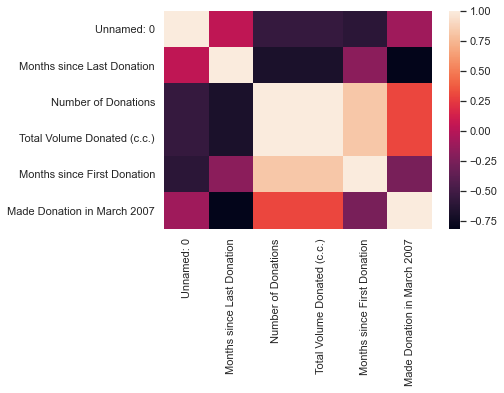

In [96]:
sns.heatmap(df_corr)

# Data visualization to get some insights

## Count plot of target
**We can clearly see that the data is unbalanced**

<AxesSubplot:xlabel='Made Donation in March 2007', ylabel='count'>

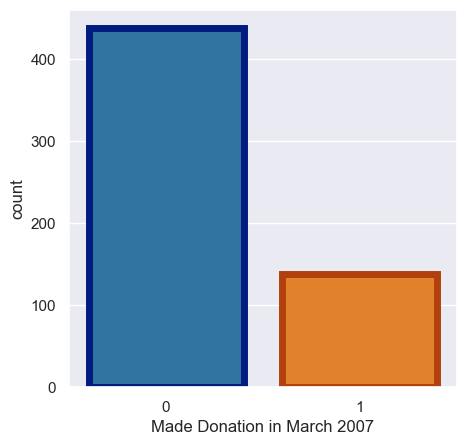

In [82]:
fig = plt.figure(figsize=(5,5), dpi=100)
sns.countplot(x='Made Donation in March 2007', data=df,linewidth=5,edgecolor=sns.color_palette("dark", 3))

## Box Plot comparison between first and last donation

In [10]:
df[["Months since First Donation","Months since Last Donation"]].iplot(kind='box')

## Box plot between No. of donations and Per target (0 1)

<AxesSubplot:xlabel='Made Donation in March 2007', ylabel='Number of Donations'>

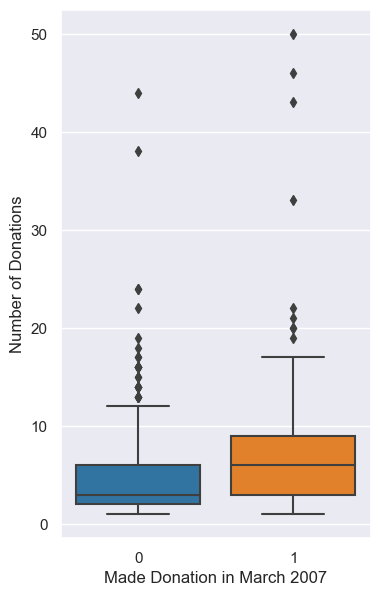

In [12]:
fig = plt.figure(figsize=(4,7), dpi=100)
sns.boxplot(x="Made Donation in March 2007", y="Number of Donations",data=df)

## Pair Plot

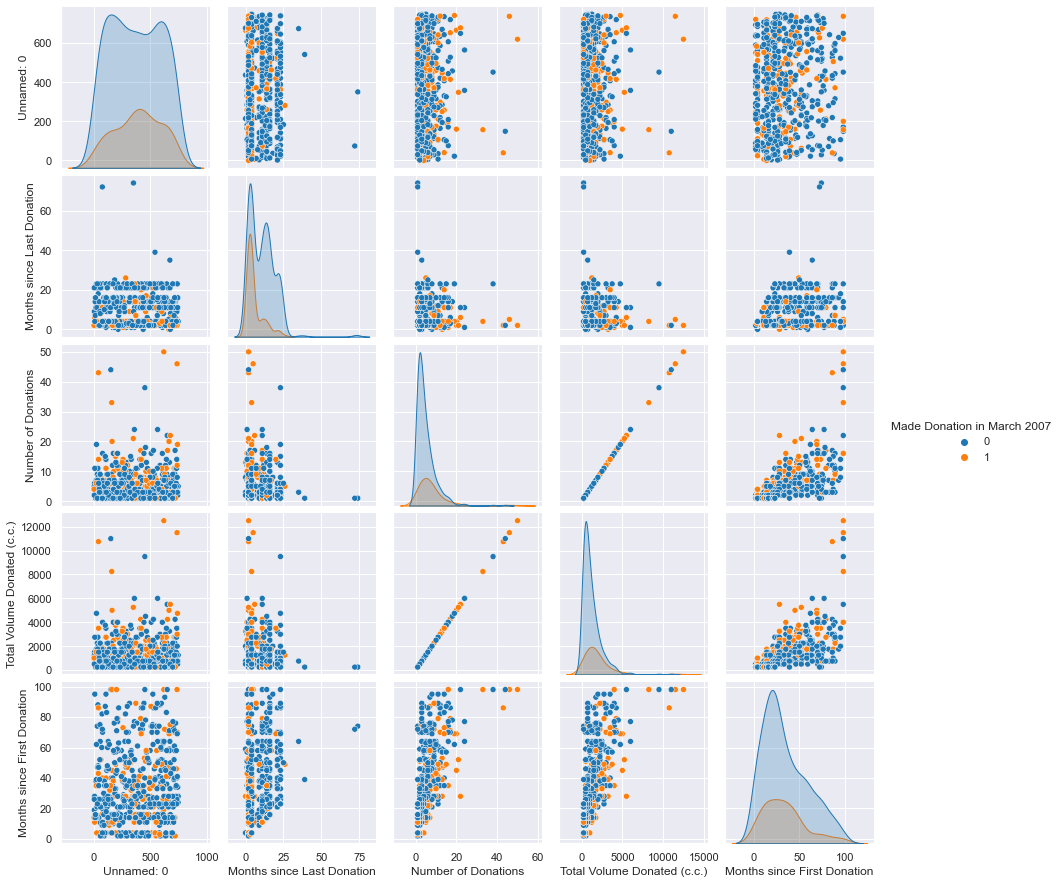

In [13]:
sns.pairplot(df,hue="Made Donation in March 2007")

## Join plot between Number of Donations and Total Volume Donated

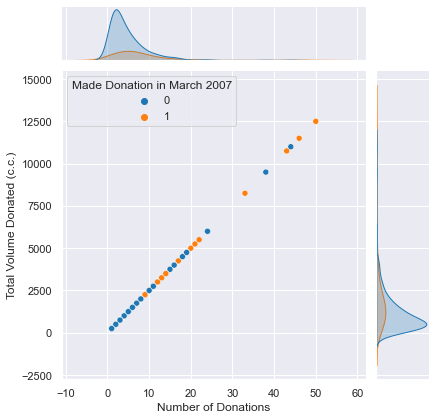

In [14]:
sns.jointplot(x='Number of Donations',y='Total Volume Donated (c.c.)',data=df,hue="Made Donation in March 2007")

### The below shows the comparision between the F1 scores and accuracy of the models made for this data 
**As the data is unbalanced the F1 score of 1 is very low so we will balance the data first to make the accurate model** 

In [73]:
pf=pd.read_excel("ACCURACY.xlsx")
pf.head()

,Model,Accuracy,F1-score 0,F1-score 1
0,LR,74,85,21
1,KNN,74,84,38
2,RF,77,86,34
3,SVC,72,84,6
4,NB,73,85,0


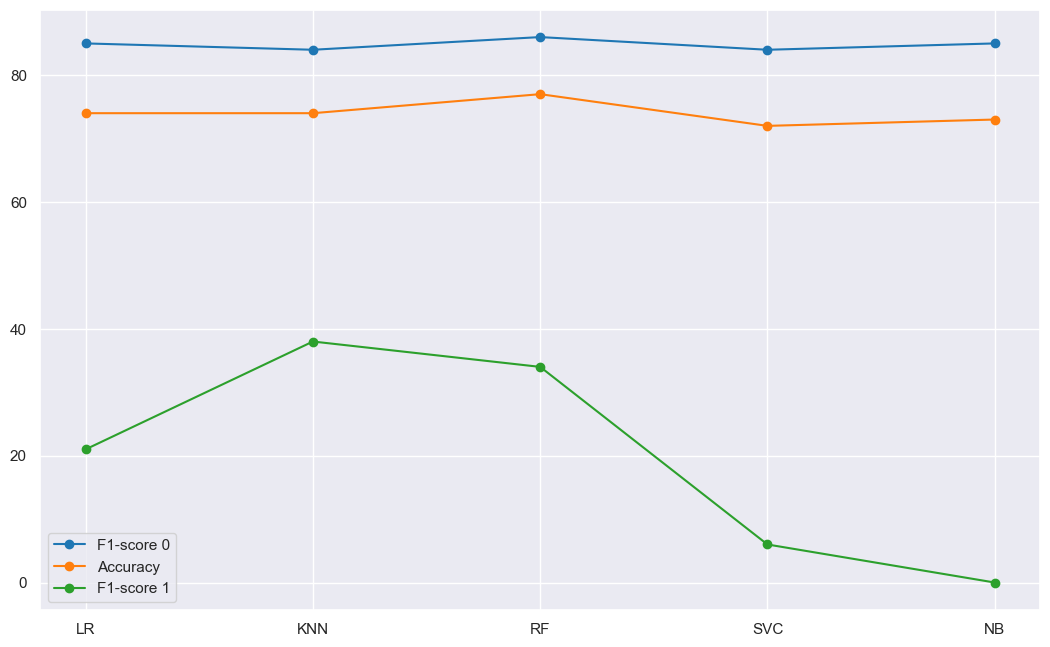

In [74]:
fig = plt.figure(figsize=(10,6), dpi=100)
ax = fig.add_axes([0,0,1,1])

ax.plot(pf.Model, pf['F1-score 0'],label="F1-score 0",marker='o')
ax.plot(pf.Model, pf.Accuracy,label="Accuracy",marker='o')
ax.plot(pf.Model, pf['F1-score 1'],label="F1-score 1",marker='o')
ax.plot()
ax.legend()

### After balancing the data 

In [67]:
bf=pd.read_excel("Balanced.xlsx")
bf.head()

,Model,Accuracy,F1- score 0,F1- score 1
0,LR (Oversampling),65,64,66
1,RF (Oversampling),83,81,79
2,LR(Ensembling),59,68,45
3,RF (Ensembling),66,75,46


[]

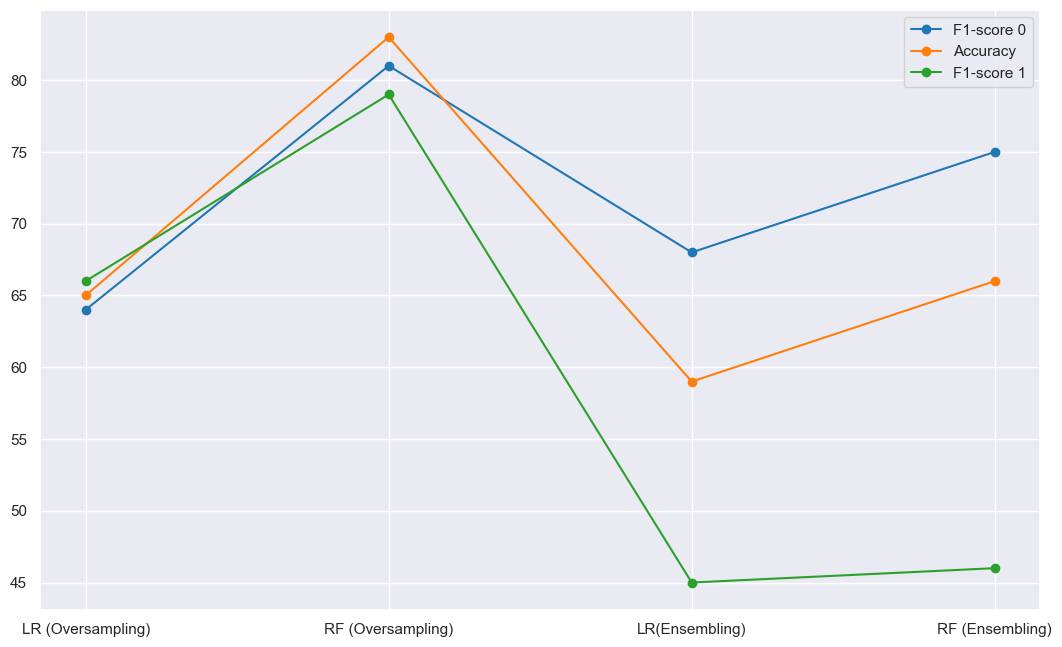

In [71]:
fig = plt.figure(figsize=(10,6), dpi=100)
ax = fig.add_axes([0,0,1,1])

ax.plot(bf.Model, pf['F1- score 0'],label="F1-score 0",marker='o')
ax.plot(bf.Model, pf.Accuracy,label="Accuracy",marker='o')
ax.plot(bf.Model, pf['F1- score 1'],label="F1-score 1",marker='o')
ax.legend()
ax.plot()

# Normalizing the values

In [15]:
from sklearn import preprocessing
import pandas as pd
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
names = df.columns
d = scaler.fit_transform(df)
df_new = pd.DataFrame(d, columns=names)
df_new.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,0.828648,0.027027,1.000000,1.000000,1.000000,1.0
1,0.888889,0.000000,0.244898,0.244898,0.270833,1.0
2,0.590361,0.013514,0.306122,0.306122,0.343750,1.0
3,0.214190,0.027027,0.387755,0.387755,0.447917,1.0
4,0.479250,0.013514,0.469388,0.469388,0.781250,0.0


# Giving names to the headers

In [16]:
df_new.columns = ["Unnamed: 0", "Months since Last Donation", "Number of Donations", "Total Volume Donated (c.c.)","Months since First Donation","Made Donation in March 2007"]

In [17]:
df_new.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,0.828648,0.027027,1.000000,1.000000,1.000000,1.0
1,0.888889,0.000000,0.244898,0.244898,0.270833,1.0
2,0.590361,0.013514,0.306122,0.306122,0.343750,1.0
3,0.214190,0.027027,0.387755,0.387755,0.447917,1.0
4,0.479250,0.013514,0.469388,0.469388,0.781250,0.0


# Differentiating features and labels

In [18]:
X=df_new.iloc[:,1:-1]
y=df_new['Made Donation in March 2007']
X.head(2)

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,0.027027,1.000000,1.000000,1.000000
1,0.000000,0.244898,0.244898,0.270833


# Trying to balance the data using oversampling

In [19]:
class_count_0, class_count_1= df_new["Made Donation in March 2007"].value_counts()
class_count_0= df_new[df_new["Made Donation in March 2007"]==0]
class_count_1= df_new[df_new["Made Donation in March 2007"]==1]

In [20]:
Final_class_1 = class_count_1.sample(438,replace= True) 

In [21]:
over_sample_df=pd.concat([Final_class_1,class_count_0],axis=0)

In [22]:
X=over_sample_df.iloc[:,1:-1]
y=over_sample_df['Made Donation in March 2007']
y.tail(3)

573    0.0
574    0.0
575    0.0
Name: Made Donation in March 2007, dtype: float64

# Spliting the data 

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15)

# Modeling

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model=RandomForestClassifier(
random_state=15,
n_estimators=40, #no. of trees to make
    max_depth=5
)
#Fitting the model
model.fit(X_train,y_train)
#Predicting
y_predict= model.predict(X_test)
accuracy_score(y_test,y_predict)

0.7670454545454546

# Confusion matrix

In [29]:
pd.crosstab(y_test,y_predict)

col_0,0.0,1.0
Made Donation in March 2007,,
0.0,67,28
1.0,13,68


# Classification report

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

         0.0       0.71      0.84      0.77        80
         1.0       0.84      0.71      0.77        96

    accuracy                           0.77       176
   macro avg       0.77      0.77      0.77       176
weighted avg       0.78      0.77      0.77       176



# Grid search

In [32]:
from sklearn.model_selection import GridSearchCV

parameters={
'random_state':[10,13,15,16,20,25],
'n_estimators':[100,200,40,50,500,344], #no. of trees to make
'max_depth':[3,5,6,8,9,10,14]
}
grid_model=GridSearchCV(RandomForestClassifier(),parameters,verbose=2)
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits
[CV] END .....max_depth=3, n_estimators=100, random_state=10; total time=   0.1s
[CV] END .....max_depth=3, n_estimators=100, random_state=10; total time=   0.1s
[CV] END .....max_depth=3, n_estimators=100, random_state=10; total time=   0.1s
[CV] END .....max_depth=3, n_estimators=100, random_state=10; total time=   0.1s
[CV] END .....max_depth=3, n_estimators=100, random_state=10; total time=   0.1s
[CV] END .....max_depth=3, n_estimators=100, random_state=13; total time=   0.1s
[CV] END .....max_depth=3, n_estimators=100, random_state=13; total time=   0.1s
[CV] END .....max_depth=3, n_estimators=100, random_state=13; total time=   0.1s
[CV] END .....max_depth=3, n_estimators=100, random_state=13; total time=   0.1s
[CV] END .....max_depth=3, n_estimators=100, random_state=13; total time=   0.1s
[CV] END .....max_depth=3, n_estimators=100, random_state=15; total time=   0.1s
[CV] END .....max_depth=3, n_estimators=100, 

[CV] END ......max_depth=3, n_estimators=50, random_state=15; total time=   0.1s
[CV] END ......max_depth=3, n_estimators=50, random_state=15; total time=   0.1s
[CV] END ......max_depth=3, n_estimators=50, random_state=16; total time=   0.1s
[CV] END ......max_depth=3, n_estimators=50, random_state=16; total time=   0.1s
[CV] END ......max_depth=3, n_estimators=50, random_state=16; total time=   0.1s
[CV] END ......max_depth=3, n_estimators=50, random_state=16; total time=   0.1s
[CV] END ......max_depth=3, n_estimators=50, random_state=16; total time=   0.1s
[CV] END ......max_depth=3, n_estimators=50, random_state=20; total time=   0.1s
[CV] END ......max_depth=3, n_estimators=50, random_state=20; total time=   0.1s
[CV] END ......max_depth=3, n_estimators=50, random_state=20; total time=   0.1s
[CV] END ......max_depth=3, n_estimators=50, random_state=20; total time=   0.1s
[CV] END ......max_depth=3, n_estimators=50, random_state=20; total time=   0.1s
[CV] END ......max_depth=3, 

[CV] END .....max_depth=5, n_estimators=100, random_state=25; total time=   0.1s
[CV] END .....max_depth=5, n_estimators=100, random_state=25; total time=   0.1s
[CV] END .....max_depth=5, n_estimators=100, random_state=25; total time=   0.1s
[CV] END .....max_depth=5, n_estimators=100, random_state=25; total time=   0.1s
[CV] END .....max_depth=5, n_estimators=100, random_state=25; total time=   0.1s
[CV] END .....max_depth=5, n_estimators=200, random_state=10; total time=   0.3s
[CV] END .....max_depth=5, n_estimators=200, random_state=10; total time=   0.3s
[CV] END .....max_depth=5, n_estimators=200, random_state=10; total time=   0.3s
[CV] END .....max_depth=5, n_estimators=200, random_state=10; total time=   0.3s
[CV] END .....max_depth=5, n_estimators=200, random_state=10; total time=   0.3s
[CV] END .....max_depth=5, n_estimators=200, random_state=13; total time=   0.3s
[CV] END .....max_depth=5, n_estimators=200, random_state=13; total time=   0.3s
[CV] END .....max_depth=5, n

[CV] END .....max_depth=5, n_estimators=500, random_state=13; total time=   0.7s
[CV] END .....max_depth=5, n_estimators=500, random_state=13; total time=   0.7s
[CV] END .....max_depth=5, n_estimators=500, random_state=13; total time=   0.7s
[CV] END .....max_depth=5, n_estimators=500, random_state=15; total time=   0.7s
[CV] END .....max_depth=5, n_estimators=500, random_state=15; total time=   0.7s
[CV] END .....max_depth=5, n_estimators=500, random_state=15; total time=   0.7s
[CV] END .....max_depth=5, n_estimators=500, random_state=15; total time=   0.7s
[CV] END .....max_depth=5, n_estimators=500, random_state=15; total time=   0.7s
[CV] END .....max_depth=5, n_estimators=500, random_state=16; total time=   0.7s
[CV] END .....max_depth=5, n_estimators=500, random_state=16; total time=   0.7s
[CV] END .....max_depth=5, n_estimators=500, random_state=16; total time=   0.7s
[CV] END .....max_depth=5, n_estimators=500, random_state=16; total time=   0.7s
[CV] END .....max_depth=5, n

[CV] END .....max_depth=6, n_estimators=200, random_state=16; total time=   0.3s
[CV] END .....max_depth=6, n_estimators=200, random_state=20; total time=   0.3s
[CV] END .....max_depth=6, n_estimators=200, random_state=20; total time=   0.3s
[CV] END .....max_depth=6, n_estimators=200, random_state=20; total time=   0.3s
[CV] END .....max_depth=6, n_estimators=200, random_state=20; total time=   0.3s
[CV] END .....max_depth=6, n_estimators=200, random_state=20; total time=   0.3s
[CV] END .....max_depth=6, n_estimators=200, random_state=25; total time=   0.3s
[CV] END .....max_depth=6, n_estimators=200, random_state=25; total time=   0.3s
[CV] END .....max_depth=6, n_estimators=200, random_state=25; total time=   0.3s
[CV] END .....max_depth=6, n_estimators=200, random_state=25; total time=   0.3s
[CV] END .....max_depth=6, n_estimators=200, random_state=25; total time=   0.3s
[CV] END ......max_depth=6, n_estimators=40, random_state=10; total time=   0.1s
[CV] END ......max_depth=6, 

[CV] END .....max_depth=6, n_estimators=344, random_state=10; total time=   0.5s
[CV] END .....max_depth=6, n_estimators=344, random_state=10; total time=   0.5s
[CV] END .....max_depth=6, n_estimators=344, random_state=10; total time=   0.5s
[CV] END .....max_depth=6, n_estimators=344, random_state=10; total time=   0.5s
[CV] END .....max_depth=6, n_estimators=344, random_state=13; total time=   0.5s
[CV] END .....max_depth=6, n_estimators=344, random_state=13; total time=   0.5s
[CV] END .....max_depth=6, n_estimators=344, random_state=13; total time=   0.5s
[CV] END .....max_depth=6, n_estimators=344, random_state=13; total time=   0.5s
[CV] END .....max_depth=6, n_estimators=344, random_state=13; total time=   0.5s
[CV] END .....max_depth=6, n_estimators=344, random_state=15; total time=   0.5s
[CV] END .....max_depth=6, n_estimators=344, random_state=15; total time=   0.5s
[CV] END .....max_depth=6, n_estimators=344, random_state=15; total time=   0.5s
[CV] END .....max_depth=6, n

[CV] END ......max_depth=8, n_estimators=40, random_state=16; total time=   0.1s
[CV] END ......max_depth=8, n_estimators=40, random_state=16; total time=   0.1s
[CV] END ......max_depth=8, n_estimators=40, random_state=16; total time=   0.1s
[CV] END ......max_depth=8, n_estimators=40, random_state=16; total time=   0.1s
[CV] END ......max_depth=8, n_estimators=40, random_state=16; total time=   0.1s
[CV] END ......max_depth=8, n_estimators=40, random_state=20; total time=   0.1s
[CV] END ......max_depth=8, n_estimators=40, random_state=20; total time=   0.1s
[CV] END ......max_depth=8, n_estimators=40, random_state=20; total time=   0.1s
[CV] END ......max_depth=8, n_estimators=40, random_state=20; total time=   0.1s
[CV] END ......max_depth=8, n_estimators=40, random_state=20; total time=   0.1s
[CV] END ......max_depth=8, n_estimators=40, random_state=25; total time=   0.1s
[CV] END ......max_depth=8, n_estimators=40, random_state=25; total time=   0.1s
[CV] END ......max_depth=8, 

[CV] END .....max_depth=8, n_estimators=344, random_state=25; total time=   0.5s
[CV] END .....max_depth=8, n_estimators=344, random_state=25; total time=   0.5s
[CV] END .....max_depth=8, n_estimators=344, random_state=25; total time=   0.5s
[CV] END .....max_depth=9, n_estimators=100, random_state=10; total time=   0.1s
[CV] END .....max_depth=9, n_estimators=100, random_state=10; total time=   0.1s
[CV] END .....max_depth=9, n_estimators=100, random_state=10; total time=   0.1s
[CV] END .....max_depth=9, n_estimators=100, random_state=10; total time=   0.1s
[CV] END .....max_depth=9, n_estimators=100, random_state=10; total time=   0.1s
[CV] END .....max_depth=9, n_estimators=100, random_state=13; total time=   0.1s
[CV] END .....max_depth=9, n_estimators=100, random_state=13; total time=   0.1s
[CV] END .....max_depth=9, n_estimators=100, random_state=13; total time=   0.1s
[CV] END .....max_depth=9, n_estimators=100, random_state=13; total time=   0.1s
[CV] END .....max_depth=9, n

[CV] END ......max_depth=9, n_estimators=50, random_state=15; total time=   0.1s
[CV] END ......max_depth=9, n_estimators=50, random_state=15; total time=   0.1s
[CV] END ......max_depth=9, n_estimators=50, random_state=15; total time=   0.1s
[CV] END ......max_depth=9, n_estimators=50, random_state=15; total time=   0.1s
[CV] END ......max_depth=9, n_estimators=50, random_state=15; total time=   0.1s
[CV] END ......max_depth=9, n_estimators=50, random_state=16; total time=   0.1s
[CV] END ......max_depth=9, n_estimators=50, random_state=16; total time=   0.1s
[CV] END ......max_depth=9, n_estimators=50, random_state=16; total time=   0.1s
[CV] END ......max_depth=9, n_estimators=50, random_state=16; total time=   0.1s
[CV] END ......max_depth=9, n_estimators=50, random_state=16; total time=   0.1s
[CV] END ......max_depth=9, n_estimators=50, random_state=20; total time=   0.1s
[CV] END ......max_depth=9, n_estimators=50, random_state=20; total time=   0.1s
[CV] END ......max_depth=9, 

[CV] END ....max_depth=10, n_estimators=100, random_state=20; total time=   0.1s
[CV] END ....max_depth=10, n_estimators=100, random_state=20; total time=   0.1s
[CV] END ....max_depth=10, n_estimators=100, random_state=25; total time=   0.1s
[CV] END ....max_depth=10, n_estimators=100, random_state=25; total time=   0.1s
[CV] END ....max_depth=10, n_estimators=100, random_state=25; total time=   0.1s
[CV] END ....max_depth=10, n_estimators=100, random_state=25; total time=   0.1s
[CV] END ....max_depth=10, n_estimators=100, random_state=25; total time=   0.2s
[CV] END ....max_depth=10, n_estimators=200, random_state=10; total time=   0.3s
[CV] END ....max_depth=10, n_estimators=200, random_state=10; total time=   0.3s
[CV] END ....max_depth=10, n_estimators=200, random_state=10; total time=   0.3s
[CV] END ....max_depth=10, n_estimators=200, random_state=10; total time=   0.3s
[CV] END ....max_depth=10, n_estimators=200, random_state=10; total time=   0.3s
[CV] END ....max_depth=10, n

[CV] END ....max_depth=10, n_estimators=500, random_state=13; total time=   0.7s
[CV] END ....max_depth=10, n_estimators=500, random_state=13; total time=   0.7s
[CV] END ....max_depth=10, n_estimators=500, random_state=13; total time=   0.7s
[CV] END ....max_depth=10, n_estimators=500, random_state=13; total time=   0.7s
[CV] END ....max_depth=10, n_estimators=500, random_state=13; total time=   0.7s
[CV] END ....max_depth=10, n_estimators=500, random_state=15; total time=   0.7s
[CV] END ....max_depth=10, n_estimators=500, random_state=15; total time=   0.7s
[CV] END ....max_depth=10, n_estimators=500, random_state=15; total time=   0.7s
[CV] END ....max_depth=10, n_estimators=500, random_state=15; total time=   0.7s
[CV] END ....max_depth=10, n_estimators=500, random_state=15; total time=   0.7s
[CV] END ....max_depth=10, n_estimators=500, random_state=16; total time=   0.7s
[CV] END ....max_depth=10, n_estimators=500, random_state=16; total time=   0.7s
[CV] END ....max_depth=10, n

[CV] END ....max_depth=14, n_estimators=200, random_state=16; total time=   0.3s
[CV] END ....max_depth=14, n_estimators=200, random_state=16; total time=   0.3s
[CV] END ....max_depth=14, n_estimators=200, random_state=16; total time=   0.3s
[CV] END ....max_depth=14, n_estimators=200, random_state=20; total time=   0.3s
[CV] END ....max_depth=14, n_estimators=200, random_state=20; total time=   0.3s
[CV] END ....max_depth=14, n_estimators=200, random_state=20; total time=   0.3s
[CV] END ....max_depth=14, n_estimators=200, random_state=20; total time=   0.3s
[CV] END ....max_depth=14, n_estimators=200, random_state=20; total time=   0.3s
[CV] END ....max_depth=14, n_estimators=200, random_state=25; total time=   0.3s
[CV] END ....max_depth=14, n_estimators=200, random_state=25; total time=   0.3s
[CV] END ....max_depth=14, n_estimators=200, random_state=25; total time=   0.3s
[CV] END ....max_depth=14, n_estimators=200, random_state=25; total time=   0.3s
[CV] END ....max_depth=14, n

[CV] END ....max_depth=14, n_estimators=500, random_state=25; total time=   0.8s
[CV] END ....max_depth=14, n_estimators=344, random_state=10; total time=   0.5s
[CV] END ....max_depth=14, n_estimators=344, random_state=10; total time=   0.5s
[CV] END ....max_depth=14, n_estimators=344, random_state=10; total time=   0.5s
[CV] END ....max_depth=14, n_estimators=344, random_state=10; total time=   0.5s
[CV] END ....max_depth=14, n_estimators=344, random_state=10; total time=   0.5s
[CV] END ....max_depth=14, n_estimators=344, random_state=13; total time=   0.5s
[CV] END ....max_depth=14, n_estimators=344, random_state=13; total time=   0.5s
[CV] END ....max_depth=14, n_estimators=344, random_state=13; total time=   0.5s
[CV] END ....max_depth=14, n_estimators=344, random_state=13; total time=   0.5s
[CV] END ....max_depth=14, n_estimators=344, random_state=13; total time=   0.5s
[CV] END ....max_depth=14, n_estimators=344, random_state=15; total time=   0.5s
[CV] END ....max_depth=14, n

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 6, 8, 9, 10, 14],
                         'n_estimators': [100, 200, 40, 50, 500, 344],
                         'random_state': [10, 13, 15, 16, 20, 25]},
             verbose=2)

# Got improved accuracy

In [33]:
grid_model.best_score_

0.832857142857143

# Got best parameters for model

In [34]:
grid_model.best_params_ 

{'max_depth': 14, 'n_estimators': 40, 'random_state': 16}

# Prediction

In [35]:
y_predict=grid_model.predict(X_test)

# Confusion matrix

In [36]:
pd.crosstab(y_test,y_predict)

col_0,0.0,1.0
Made Donation in March 2007,,
0.0,74,21
1.0,14,67


# Classification report

In [37]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

         0.0       0.78      0.84      0.81        88
         1.0       0.83      0.76      0.79        88

    accuracy                           0.80       176
   macro avg       0.80      0.80      0.80       176
weighted avg       0.80      0.80      0.80       176



# Saving the model 

In [34]:
import joblib
joblib.dump(grid_model, "/Users/ayushmehta/Downloads/Capston/Blood_donation/RF_Oversampling_gridsearch83%.pkl")

['/Users/ayushmehta/Downloads/Capston/Blood_donation/RF_Oversampling_gridsearch83%.pkl']